In [2]:
def psd(d):
    psd = feature_extractor_welchPSD(BASE_FOLDER)
    mf = memory_wave_file()
    mf.filepath = filename
    mf.srate = fs
    mf.channel = d
    psd.create_from_wav(mf)
    psd.plot()
    plt.show()

In [3]:
%run -i A:\Dev\NF_Prj_MIMII_Dataset\utility\feature_extractor\WPE_by_TengXiang\stft.py
%run -i A:\Dev\NF_Prj_MIMII_Dataset\utility\feature_extractor\WPE_by_TengXiang\wpe.py

 
#cfgs = Configrations().parse()
filename = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\pump\id_00\normal\00000001.wav'
wpe = WpeMethod(8, 8, 12)
data, fs = wpe.load_audio(filename)
drv_data = wpe.run_offline(data)
#wpe.write_wav(drv_data, fs, cfgs.output)


Settings:
Input channel: 8
Output channel: 8
Prediction order: 12

Processing...
Done!
Total time: 4.943470



In [4]:
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
denoise = feature_extractor_pre_nnFilterDenoise(BASE_FOLDER,'den')
denoise.set_hyperparamter(aggregation=np.average, channel='all')
denoise.create_from_wav(filename)
data_denoise_dir = denoise.get_wav_memory_file()
data_denoise_dir = data_denoise_dir.channel
mf = memory_wave_file()
mf.filepath = filename
mf.srate = fs
mf.channel = drv_data
denoise.set_hyperparamter(aggregation=np.average, channel=0)
denoise.create_from_wav(mf)
data_denoise_drv = denoise.get_wav_memory_file()
data_denoise_drv = data_denoise_drv.channel

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother


In [73]:
wpe = WpeMethod(8, 1, 12)
dendrv_data = wpe.run_offline(data_denoise_dir)


Settings:
Input channel: 8
Output channel: 1
Prediction order: 12

Processing...
Done!
Total time: 4.239169



In [68]:
from IPython.display import display, Markdown, Audio
import librosa.display
import matplotlib.pyplot as plt

#### orginal

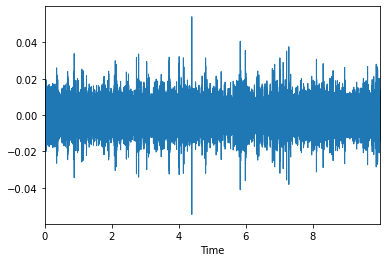

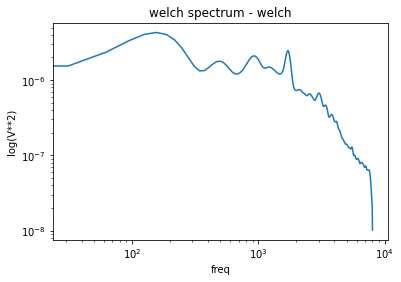

#### orginal denoised

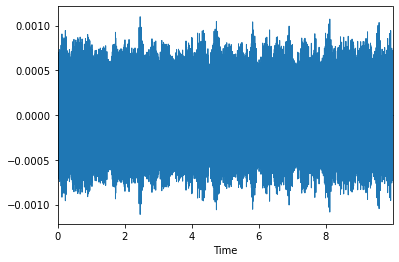

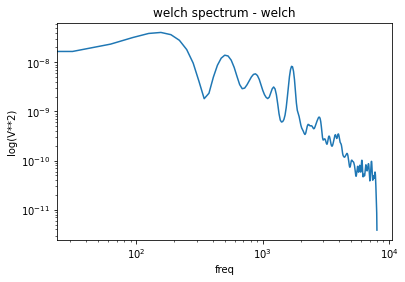

#### orginal denoised dereverb

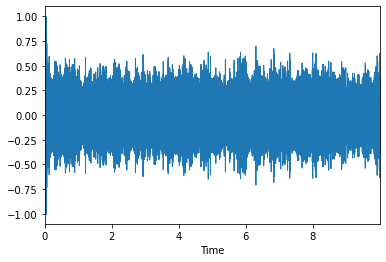

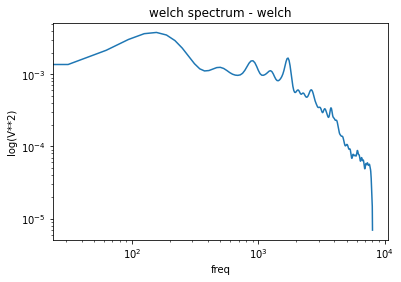

#### orginal dereverb

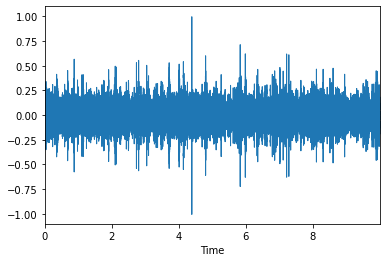

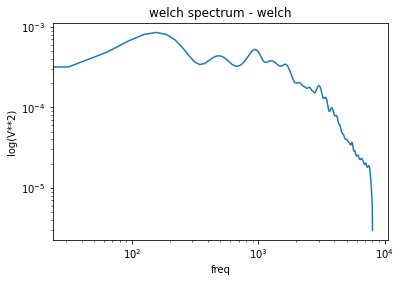

#### orginal dereverb denoised

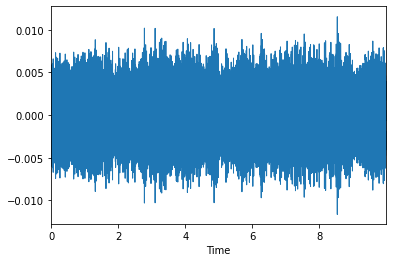

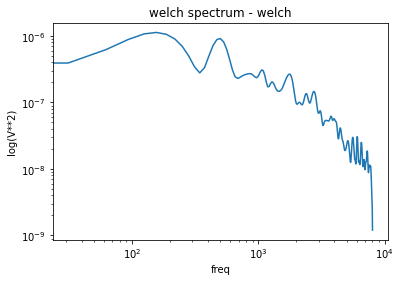

In [74]:
display(Markdown('#### ' + 'orginal'))
display(Audio(data=data[0],rate=fs))
librosa.display.waveplot(data[0],fs)
plt.show()
psd(data)

display(Markdown('#### ' + 'orginal denoised'))
display(Audio(data=data_denoise_dir[0],rate=fs))
librosa.display.waveplot(data_denoise_dir[0],fs)
plt.show()
psd(data_denoise_dir)

display(Markdown('#### ' + 'orginal denoised dereverb'))
display(Audio(data=dendrv_data[0],rate=fs))
librosa.display.waveplot(dendrv_data[0],fs)
plt.show()
psd(dendrv_data)

display(Markdown('#### ' + 'orginal dereverb'))
display(Audio(data=drv_data[0],rate=fs))
librosa.display.waveplot(drv_data[0],fs)
plt.show()
psd(drv_data)

display(Markdown('#### ' + 'orginal dereverb denoised'))
display(Audio(data=data_denoise_drv[0],rate=fs))
librosa.display.waveplot(data_denoise_drv[0],fs)

plt.show()
psd(data_denoise_drv)

https://distantspeechrecognition.sourceforge.io/btk20_documentation/user_docs/dereverberation.html